

# Notebook Description

I will be performing Topic Modeling over the dataset(Ken Jee YT Data) hopefully answering the following question:

* [ What are the themes of the comment data?](http://)

**Topic Modeling**: The NLP task of identifying automatically major themes in a text, usually by identifying informative words.

There are two main uses for topic modeling. The first is to help in identifying major topics in unlabeled texts. You can think of it as a replacement for word clouds to help you understand the recurring themes in a text. The second use is to identify which words are important for text that is labeled for topic.




I will be using one of the four files to perform this task:

*   All Comments - This is all of his comment data gathered from the YouTube API. He have anonymized the users so don't worry about your name showing up!



# Loading the libraries

In [1]:
# read in the libraries we're going to use
library(tidyverse) # general utility & workflow functions
library(tidytext) # tidy implimentation of NLP methods
library(topicmodels) # for LDA topic modelling 
library(tm) # general text mining functions, making document term matrixes
library(SnowballC) # for stemming
library(doParallel)
library(scales)
library(repr) #Resizing plots
library(ggthemes) # themes



── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: NLP


Attaching package: ‘NLP’


The following object is masked from ‘package:ggplot2’:

    annotate


The following object is masked from ‘package:httr’:

    content


Loading required package: foreach


Attaching package: ‘foreach’


The following objects are masked from ‘package:purrr’:

    accumulate, when


Loading required package: iterators

Loading required package: parallel


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




# Importing the data

In [2]:
# reading in our data
all_comments <- read_csv("../input/ken-jee-youtube-data/All_Comments_Final.csv", show_col_types = FALSE)

# Looking at the first observations
head(all_comments)

# summary of the data
summary(all_comments)




Comments,Comment_ID,Reply_Count,Like_Count,Date,VidId,user_ID
<chr>,<chr>,<dbl>,<dbl>,<dttm>,<chr>,<chr>
"Thanks for this video Ken. I decided to go into Tech in 2018 by learning web development. Learnt a bit of HTML, CSS and Javascript. My goals has since evolved through this period as I got interested in python programming and Data science. My current interest now tends towards deep learning and AI Interesting my knowledge of front end web development will be very helpful in web scraping.",UgxFZTIzC4UPyhhX_PZ4AaABAg,0,0,2022-01-22 08:13:29,xpIFS6jZbe8,user_981
"Hello ken jee!!! I'm doing a graduation on Computer Science and i really keen to learn Data Science. From where should i start? learning Python basics? If you have any resources of learning Python, could you help me providing the link? To be honest my excitement to learning data science get on the top notch after watching your this video. 😄",Ugx3IYuAufhb932GYQx4AaABAg,0,0,2022-01-22 01:09:46,xpIFS6jZbe8,user_213
"Thanks for this video, man. So useful. I'll meet you when I'm a Senior Lead Data Scientist at the Company I work for",UgyhwwoK24arzRt1mud4AaABAg,0,0,2022-01-21 23:59:05,rEWPqw6rMGI,user_1065
"Great video!!! I started learning Python 8 months ago and quickly became interested in DS, I have a background in Finace/Econ but never worked in finance (I have a construction business), my goal is to learn DS and work with investments. Having said all that im considering a boot camp and even a masters in DS, I would love to get your opinion on that. Thanks",UgwrrI7nd3WClsotmHV4AaABAg,0,0,2022-01-21 23:00:37,xpIFS6jZbe8,user_3391
"Been watching hours of your material (and Tina) because while I do know that it is not an easy field, I’ve been fascinated by it ever since I first found out about it. Data Analysis is my passion and the one thing I feel I came to the world for, and this role I feel like it’s the pinnacle of it. I will not give up.",UgxlOrHO4MHKSwY9mUN4AaABAg,0,0,2022-01-21 20:24:20,sHRq-LshG3U,user_2816
Hey Ken! I am almost finishing my university degreed in market research & marketing and I am going to focus in data science/data engineering. Currently my friends are telling me to buy a M1 Macbook but I am not sure about compatibilities with OSX and I am not familiarised with Macs (I have always being a Windows user). Do you think it is a good idea or is it better to stick with this Zbooks or any other similar Windows laptop?,UgwimG8chbbq3OQuR1Z4AaABAg,0,0,2022-01-21 14:32:13,YR9Faf1uZDg,user_2217


   Comments          Comment_ID         Reply_Count       Like_Count     
 Length:10240       Length:10240       Min.   : 0.000   Min.   :  0.000  
 Class :character   Class :character   1st Qu.: 1.000   1st Qu.:  1.000  
 Mode  :character   Mode  :character   Median : 1.000   Median :  1.000  
                                       Mean   : 1.338   Mean   :  2.768  
                                       3rd Qu.: 2.000   3rd Qu.:  2.000  
                                       Max.   :21.000   Max.   :501.000  
      Date                        VidId             user_ID         
 Min.   :2017-12-03 18:52:35   Length:10240       Length:10240      
 1st Qu.:2020-07-04 14:48:15   Class :character   Class :character  
 Median :2020-10-16 15:14:12   Mode  :character   Mode  :character  
 Mean   :2020-11-27 14:24:10                                        
 3rd Qu.:2021-04-15 20:01:44                                        
 Max.   :2022-01-22 08:13:29                                        

# Pre-Processing Text

In [3]:
# Isolating the column that am going to use i.e the Comments column
comments <- all_comments$Comments


In [4]:
# Make a volatile corpus from the vector source of the comments
comments_corpus <- VCorpus(VectorSource(comments))
comments_corpus

<<VCorpus>>
Metadata:  corpus specific: 0, document level (indexed): 0
Content:  documents: 10240

****Now that we have a corpus, we have to take it from the unorganized raw state  and start cleaning it up.****

In [5]:
#creating a function that applies preprocessing steps to the corpus
clean_corpus <- function(corpus){
    #Removing Punctuations
    corpus <- tm_map(corpus, removePunctuation)
    #Transform to lower case
    corpus <- tm_map(corpus, content_transformer(tolower))
    #removing stop words and some custom stop words(I'm adding my own custom stop words that I don't think will be very informative).
corpus <- tm_map(corpus, removeWords, words = c(stopwords("en"), "ken", "data", "science", "data Scientist", "scientist", "data science", "video", "channel"))
    #strip whitespace
    corpus <- tm_map(corpus, stripWhitespace)
    #Stemming
    corpus <- tm_map(corpus, stemDocument) 
    return(corpus)
}

clean_comments_corpus <- clean_corpus(comments_corpus)



# Create the document-term matrix(dtm) from the corpus
comments_dtm <- DocumentTermMatrix(clean_comments_corpus)

# Print out comments_dtm data
comments_dtm


# remove any empty rows in our document term matrix (if there are any we'll get an error when we try to run our LDA)
    unique_indexes <- unique(comments_dtm$i) # get the index of each unique value
    comments_dtm <- comments_dtm[unique_indexes,] # get a subset of only those indexes



comments_tidy <- tidy(comments_dtm)
head(comments_tidy, n = 10)


<<DocumentTermMatrix (documents: 10240, terms: 11254)>>
Non-/sparse entries: 139211/115101749
Sparsity           : 100%
Maximal term length: 818
Weighting          : term frequency (tf)

document,term,count
<chr>,<chr>,<dbl>
1,2018,1
1,bit,1
1,css,1
1,current,1
1,decid,1
1,deep,1
1,develop,2
1,end,1
1,evolv,1


# Building topic model with LDA


There are 2 approaches to finding number of topics, k;
* Topic coherence - is a realistic measure for identifying the number of topics.
* Quantitative measures:
1. Log-likelihood - how plausible model parameters are given the data
2. Perplexity - model's "surprise" at the data

# Determining number of topics, k

**Using Perplexity to measure the model fit**

To empirically choose the best number of topics, i choose to use  a 5-fold cross-validation. We can select the optimal number of topics based on a certain measure of the model fit. Going to  use  perplexity to measure the model fit.

**NOTE:**
The most common measure for how well a probabilistic topic model fits the data is **perplexity** (which is based on the log likelihood). The lower the perplexity, the better the fit.
Perplexity is a measure of model's **"surprise"** at the data.






**NOTE:** 
Searching for the best **k** can take a lot of time. The factors that influence the running time are:

* Number of documents
* Number of terms.
* Number of iterations.

[[1]]
 [1] "topicmodels" "stats"       "graphics"    "grDevices"   "utils"      
 [6] "datasets"    "bigrquery"   "httr"        "methods"     "base"       

[[2]]
 [1] "topicmodels" "stats"       "graphics"    "grDevices"   "utils"      
 [6] "datasets"    "bigrquery"   "httr"        "methods"     "base"       

[[3]]
 [1] "topicmodels" "stats"       "graphics"    "grDevices"   "utils"      
 [6] "datasets"    "bigrquery"   "httr"        "methods"     "base"

    user   system  elapsed 
   0.396    0.470 2454.995 

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



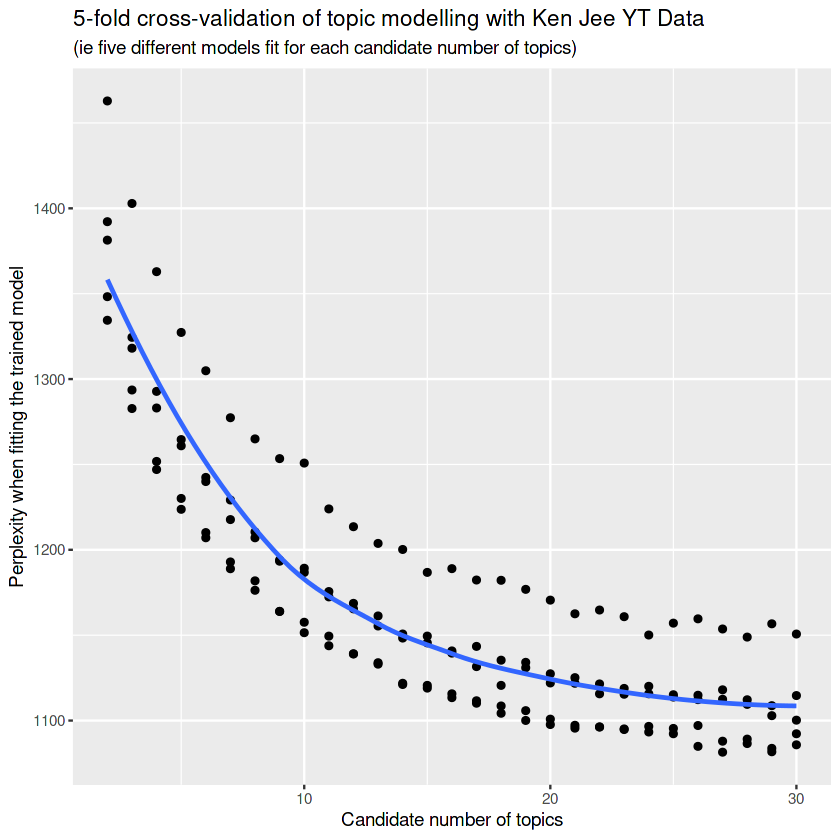

In [6]:
#5-fold cross-validation, different numbers of topics
burnin = 1000
iter = 500
keep = 50

n <- nrow(comments_dtm)

cluster <- makeCluster(detectCores(logical = TRUE) - 1) # leave one CPU spare...
registerDoParallel(cluster)
clusterEvalQ(cluster, {
   library(topicmodels)
})
folds <- 5
splitfolds <- sample(1:folds, n, replace = TRUE)
candidate_k <- c(2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30) # candidates for how many topics
clusterExport(cluster, c("comments_dtm", "burnin", "iter", "keep", "splitfolds", "folds", "candidate_k"))
# we parallelize by the different number of topics.  A processor is allocated a value of k, and does the cross-validation serially.  This is because it is assumed there are more candidate values of k than there are cross-validation folds, hence it will be more efficient to parallelise
system.time({
results <- foreach(j = 1:length(candidate_k), .combine = rbind) %dopar%{
   k <- candidate_k[j]
   results_1k <- matrix(0, nrow = folds, ncol = 2)
   colnames(results_1k) <- c("k", "perplexity")
   for(i in 1:folds){
      train_set <- comments_dtm[splitfolds != i , ]
      valid_set <- comments_dtm[splitfolds == i, ]
      
      fitted <- LDA(train_set, k = k, method = "Gibbs",
                    control = list(burnin = burnin, iter = iter, keep = keep) )
      results_1k[i,] <- c(k, perplexity(fitted, newdata = valid_set))
   }
   return(results_1k)
}
})
stopCluster(cluster)
results_df <- as.data.frame(results)
ggplot(results_df, aes(x = k, y = perplexity)) +
   geom_point() +
   geom_smooth(se = FALSE) +
   ggtitle("5-fold cross-validation of topic modelling with Ken Jee YT Data",
           "(ie five different models fit for each candidate number of topics)") +
   labs(x = "Candidate number of topics", y = "Perplexity when fitting the trained model")


 We are geting something that at least is consistent with the measures; there’s a distinct flattening out of the cross-validated perplexity somewhere between 20 and 30 topics. By the time we have 20 topics there has definitely been over-fitting. There’s still judgement required as to exactly how many topics to use, but 10 looks a good consensus number

# Visualizing Topics

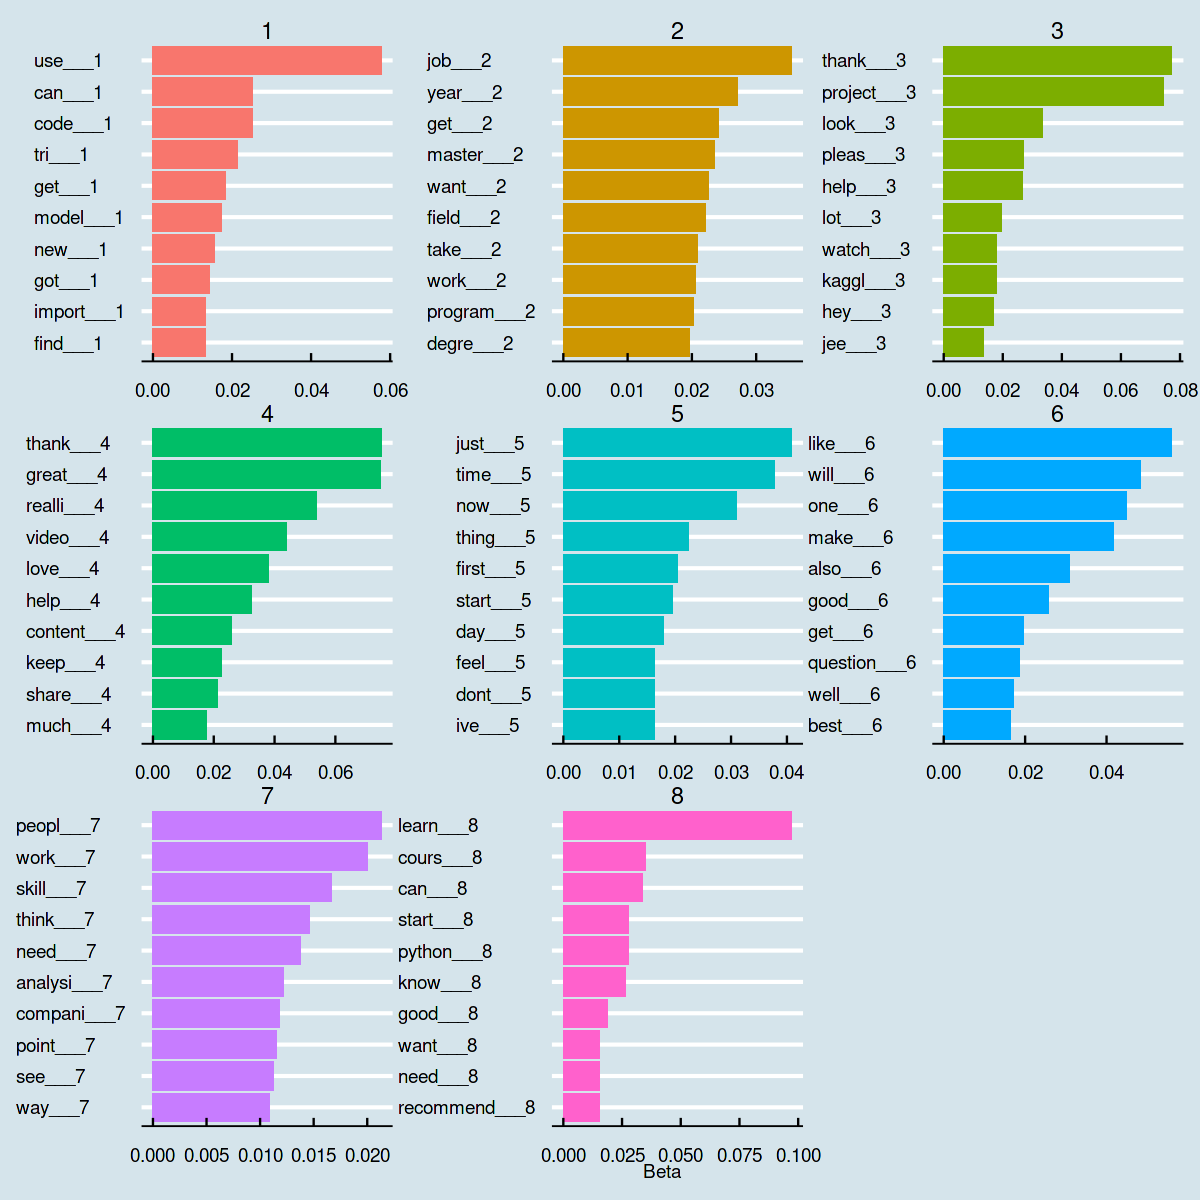

In [7]:
# I opted to fit a model  with 8 topics

finalmodel <- LDA(comments_dtm, k = 8, method = "Gibbs",
                  control = list(burnin = burnin, iter = iter, keep = keep) )

 topics <- tidy(finalmodel, matrix = "beta")
 # getting the top ten terms for each topic
    top_terms <- topics  %>% # take the topics data frame and..
      group_by(topic) %>% # treat each topic as a different group
      top_n(10, beta) %>% # get the top 10 most informative words
      ungroup() %>% # ungroup
      arrange(topic, -beta) # arrange words in descending informativeness

options(repr.plot.width = 10, repr.plot.height = 10)

top_terms %>% # take the top terms
          mutate(term = reorder_within(term, beta, topic)) %>% # sort terms by beta value 
          ggplot(aes(term, beta, fill = factor(topic))) + # plot beta by theme
          geom_col(show.legend = FALSE) + # as a bar plot
          facet_wrap(~ topic, scales = "free") + # which each topic in a seperate plot
          labs(x = NULL, y = "Beta") +  
          coord_flip() + theme_economist()


**There is still room for improvements.**